<a href="https://colab.research.google.com/github/DommiiUdomp/CNN/blob/main/CNNdigitMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
ds, info = tfds.load('MNIST', split=['train', 'test'], with_info=True)
X_train_image, y_train_label = tfds.as_numpy(tfds.load('MNIST', split='train', batch_size=-1, as_supervised=True))
X_test_image, ytest_label = tfds.as_numpy(tfds.load('MNIST', split='test', batch_size=-1, as_supervised=True))
print(type(X_train_image), X_train_image.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)


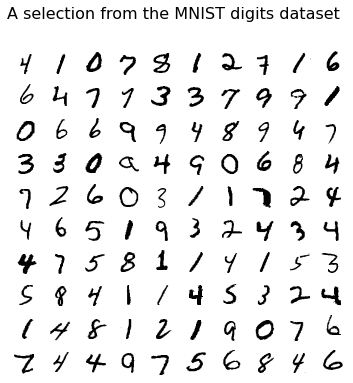

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X_train_image[idx].reshape((28, 28)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the MNIST digits dataset", fontsize=16)

In [6]:
label_names, label_y = np.unique(y_train_label, return_inverse=True)
label_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
aa = np.array(np.unique(label_y, return_counts=True)).T
aa

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

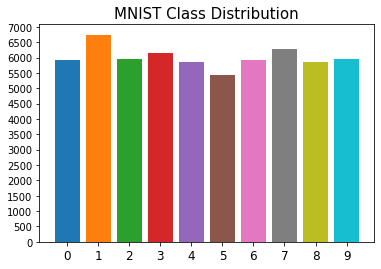

In [8]:
fig = plt.plot(figsize = (10,5))
for i in range(len(label_names)) :
  
  plt.bar(label_names[i], aa[i, 1], align='center')
  plt.xticks(label_names, fontsize=12, rotation=0)
  plt.yticks(np.arange(0, 7500, step=500))
  plt.title('MNIST Class Distribution', fontsize=15);

plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical

X_train = X_train_image.astype('float64') # Convert train and test images into 'float64' type
X_test = X_test_image.astype('float64')
#Normalize the images data #minimum and maximum values equal to 0 and 1 respectively.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

y_train = y_train_label.astype('int64') # Convert train and test labels into 'int64' type
y_test = ytest_label.astype('int64')

# convert class vectors to binary class matrices
num_classes = len(np.array(np.unique(y_train_label)))
y_train_class = to_categorical(y_train, num_classes)
y_test_class = to_categorical(y_test, num_classes)

print(f'Min: {X_train.min()}, Max: {X_train.max()}')
print(f'New_Min: {X_train_scaled.min()}, New_Max: {X_train_scaled.max()}')

Min: 0.0, Max: 255.0
New_Min: 0.0, New_Max: 1.0


In [10]:
X_grey_train = np.average(X_train_scaled, axis=-1)
X_grey_test = np.average(X_test_scaled, axis=-1)
print(X_grey_train.shape)

(60000, 28, 28)


In [11]:
l_names = label_names.astype('int')

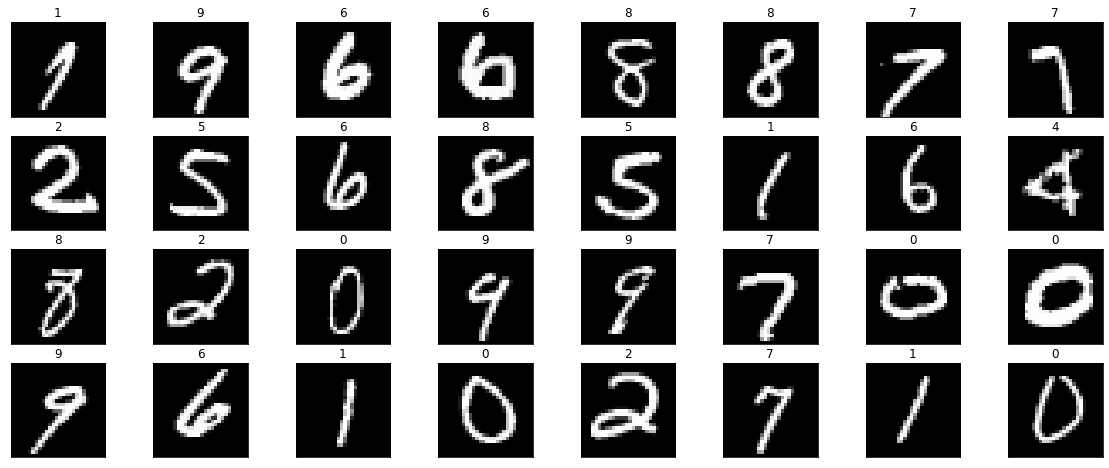

In [12]:
#Plot prepared Data
def random_plot(X,y):
  num_test_images = X_train_image.shape[0]
  random_inx = np.random.choice(num_test_images, 32)
  random_test_images = X_grey_train[random_inx, ...]
  random_test_labels = y_train_label[random_inx, ...]
  
  plt.figure(figsize=(20, 8))
  for i in range(32):
    plt.subplot(4, 8, i+1, xticks=[], yticks=[])
    plt.imshow(random_test_images[i], cmap = plt.cm.gray)
    plt.title(l_names[random_test_labels[i]])

  plt.show()

random_plot(X_test_image,y_train_label)

In [13]:
from sklearn.utils import shuffle

smallest_class = np.argmin(np.bincount(y_train_label)) # find the smallest class
print(f' the smallest class: {smallest_class}')

num_classes = len(np.array(np.unique(y_train_label))) # number of classes
print(f' the number of classes: {num_classes}')

smallest_class_obs = np.where(y_train_label == smallest_class)[0] # observations in smallest class
print(f' observations in smallest class:{smallest_class_obs.shape}')

# Get 2000 observations from each class
indBal = np.empty(0, dtype=int)
for i in range(num_classes):
  indTemp = shuffle(np.where(y_train_label == i)[0], random_state=42)[0:smallest_class_obs.shape[0]]
  indBal = np.concatenate([indBal, indTemp])

# shuffle the balanced index
indBal = shuffle(indBal, random_state = 101)

 the smallest class: 5
 the number of classes: 10
 observations in smallest class:(5421,)


In [14]:
#Make training dataset balance
y_trainclass_bal = y_train_class[indBal]
y_train_bal = y_train_label[indBal]
X_train_bal = X_train_scaled[indBal]
print(y_trainclass_bal.shape)
print(y_train_bal.shape)
print(X_train_bal.shape)

(54210, 10)
(54210,)
(54210, 28, 28, 1)


In [15]:
# One-hot encoding of train and test labels

# Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. 
# Hint: retain the channel dimension, which will now have size 1.
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_balbi = lb.fit_transform(y_trainclass_bal)
y_test_classbi = lb.fit_transform(y_test_class)
print(y_train_balbi.shape)
print(y_test_classbi.shape)

(54210, 10)
(10000, 10)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential ( [
                      Flatten (input_shape = X_train_bal[0].shape),
                      Dense (100, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8) ),
                      Dense (100, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8)),
                      Dense (100, activation = 'relu', kernel_initializer='he_uniform',bias_initializer="ones", 
                             kernel_regularizer=tf.keras.regularizers.l1(1e-8)),
                      Dense (10, activation = 'softmax'),])

model.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
               loss = tf.keras.losses.CategoricalCrossentropy() ,
               metrics = [ tf.keras.metrics.CategoricalAccuracy() ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.config.run_functions_eagerly(True)

In [18]:
history = model.fit(X_train_bal,y_train_balbi, validation_split= 0.15 , batch_size=28, epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1646/1646 [==============================] - 37s 22ms/step - loss: 2.2829 - categorical_accuracy: 0.4492 - val_loss: 1.1370 - val_categorical_accuracy: 0.7111
Epoch 2/100
1646/1646 [==============================] - 37s 22ms/step - loss: 0.8777 - categorical_accuracy: 0.7822 - val_loss: 0.7066 - val_categorical_accuracy: 0.8239
Epoch 3/100
1646/1646 [==============================] - 37s 22ms/step - loss: 0.5992 - categorical_accuracy: 0.8469 - val_loss: 0.5287 - val_categorical_accuracy: 0.8618
Epoch 4/100
1646/1646 [==============================] - 36s 22ms/step - loss: 0.4783 - categorical_accuracy: 0.8719 - val_loss: 0.4454 - val_categorical_accuracy: 0.8792
Epoch 5/100
1646/1646 [==============================] - 39s 24ms/step - loss: 0.4154 - categorical_accuracy: 0.8863 - val_loss: 0.3970 - val_categorical_accuracy: 0.8881
Epoch 6/100
1646/1646 [==============================] - 40s 25ms/step - loss: 0.3769 - categorical_accuracy: 0.8956 - val_loss: 0.3664 - val_categorical_acc

In [19]:
score = model.evaluate(X_train_bal, y_train_balbi, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  12/1695 [..............................] - ETA: 16s - loss: 0.0636 - categorical_accuracy: 0.9818

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1695/1695 [==============================] - 17s 10ms/step - loss: 0.0792 - categorical_accuracy: 0.9778
Test loss: 0.07922615855932236
Test accuracy: 0.9777900576591492


In [20]:
def plot_history(model, history) :
  plt.figure(figsize=(10,5))
  ax1 = plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower left')
  ax2 = plt.subplot(122)
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='lower right')
  plt.tight_layout()
  plt.show()

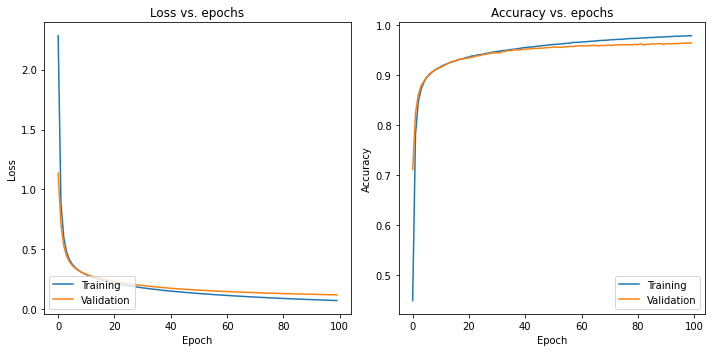

In [21]:
plot_history(model, history)

In [30]:
def eval_model_by_class(model, X_test_set, y_test_set):
  y_test_pred = model.predict(X_test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true_tmp = np.argmax(y_test_set, axis = 1)
  label_count = np.unique(y_test_true_tmp, return_counts = True)[1]

  y_test_true = [label_names[x] for x in y_test_true_tmp]
  y_test_pred = [label_names[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  pred_df = pred_df.groupby(['y_true']).sum().reset_index()
  pred_df['label_count'] = label_count
  pred_df['class_acc'] = pred_df.accurate_preds / pred_df.label_count
  pred_df = pred_df.sort_values(by = 'class_acc').reset_index()
  pred_df['overall_acc'] = sum(pred_df.accurate_preds) / sum(pred_df.label_count)
  pred_df = pred_df.sort_values('y_true').reset_index(drop = True)

  return(pred_df)

def find_wrong_preds(model, test_set, y_test_set):
  y_test_pred = model.predict(test_set)
  y_test_pred_tmp=np.argmax(y_test_pred,axis=1)

  y_test_true_tmp = np.argmax(y_test_set, axis = 1)
  label_count = np.unique(y_test_true_tmp, return_counts = True)[1]

  y_test_true = [label_names[x] for x in y_test_true_tmp]
  y_test_pred = [label_names[x] for x in y_test_pred_tmp]

  pred_df = pd.DataFrame({'y_true': y_test_true, 'y_pred': y_test_pred})
  pred_df['accurate_preds'] = pred_df.y_true == pred_df.y_pred
  # pred_df = pred_df.sort_values('y_true').reset_index(drop = True)
  pred_df = pred_df.sort_values('y_true')

  return(pred_df)

In [26]:
eval_model_by_class(model, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,index,y_true,y_pred,accurate_preds,label_count,class_acc,overall_acc
0,0,0,88,964,980,0.983673,0.9659
1,1,1,1215,1118,1135,0.985022,0.9659
2,2,2,2182,995,1032,0.964147,0.9659
3,3,3,3131,973,1010,0.963366,0.9659
4,4,4,3996,952,982,0.969450,0.9659
5,5,5,4453,850,892,0.952915,0.9659
6,6,6,5664,926,958,0.966597,0.9659
7,7,7,7075,988,1028,0.961089,0.9659
8,8,8,7640,936,974,0.960986,0.9659
9,9,9,8834,957,1009,0.948464,0.9659


In [31]:
find_wrong_preds(model, X_test_scaled, y_test_classbi)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,y_true,y_pred,accurate_preds
1289,0,0,True
5276,0,0,True
7630,0,0,True
9172,0,0,True
1243,0,0,True
...,...,...,...
2020,9,9,True
2026,9,1,False
7662,9,9,True
7643,9,9,True


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


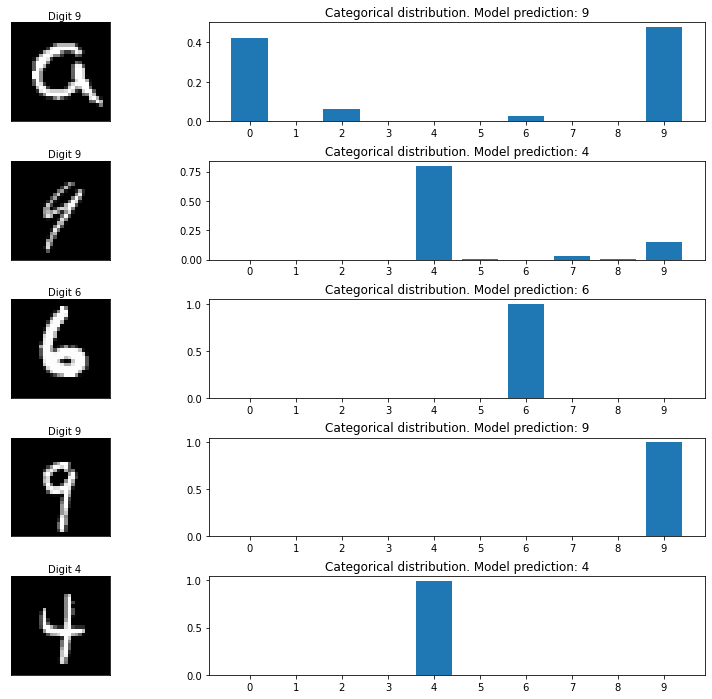

In [38]:
# Alongside the image and label, show each model’s predictive distribution as a bar chart, 
num_test_images = X_grey_test.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_grey_test[random_inx, ...]
random_test_labels = ytest_label[random_inx, ...]
16
predictions = model.predict(random_test_images)
# predictions_cnn = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image), cmap = plt.cm.gist_gray)
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


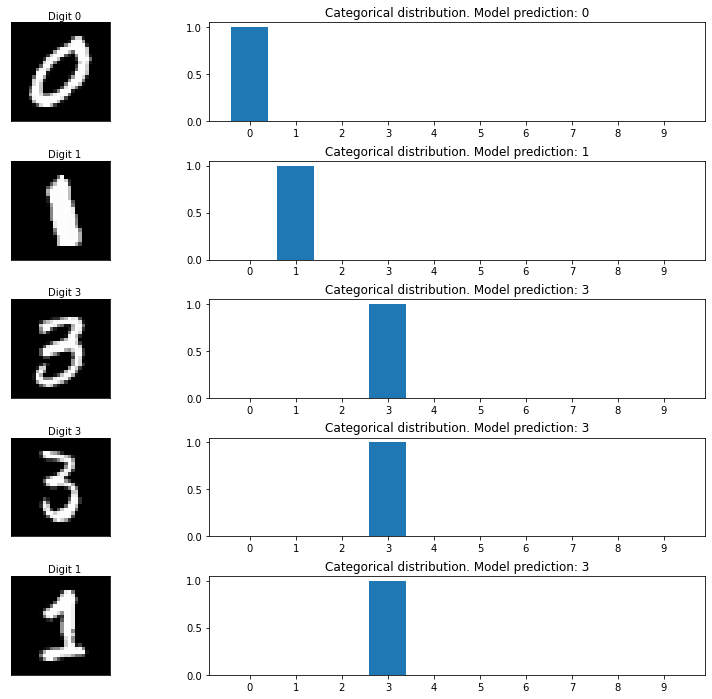

In [39]:
# Alongside the image and label, show each model’s predictive distribution as a bar chart, 
num_test_images = X_test_image.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_image[random_inx, ...]
random_test_labels = ytest_label[random_inx, ...]
16
predictions = model.predict(random_test_images)
# predictions_cnn = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image), cmap = plt.cm.gist_gray)
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

In [40]:
model.save_weights("/content/sample_data")

In [41]:
!ls

checkpoint  sample_data  sample_data.data-00000-of-00001  sample_data.index
